In [ ]:
import pandas as pd

dataset = pd.read_csv('Mall_Customers.csv')

# rename digunakan untuk mengubah nama, disini kita mengambil nama tabel untuk
# column.
dataset = dataset.rename(columns={
    'Gender': 'gender', 'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
})

In [ ]:
# ubah data kategorik menjadi data numerik
# disini kita ingin mengubah tabel gender dan mengubah nya dengan kode Replace
# yang dimana datanya yaitu ada Female dan Male yang dimana kita ubah menjadi
# 0 dan 1, otomatis Female akan menjadi no 0 dan Male menjadi 1
dataset['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

print(dataset.head(3))

   CustomerID  gender  age  annual_income  spending_score
0           1       1   19             15              39
1           2       1   21             15              81
2           3       0   20             16               6


## Import K-Means Cluster

In [ ]:
from sklearn.cluster import KMeans

# drop digunakan untuk membuang sebuah tabel, disini kita membuang tabel
# dari si CustomerID dan gender
X = dataset.drop(['CustomerID', 'gender'], axis=1)

clusters = []

for i in range(1, 11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'Inertia')

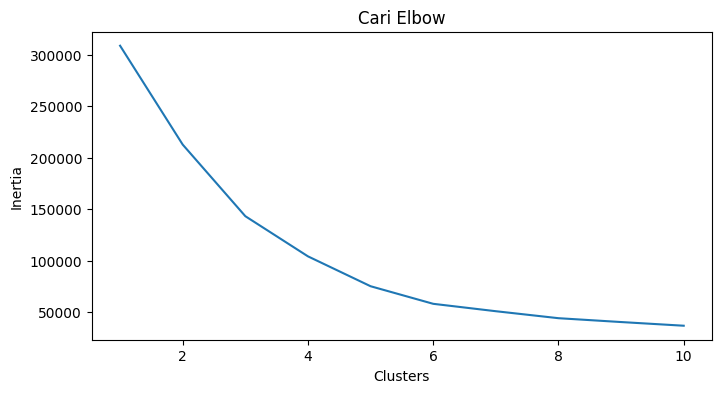

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


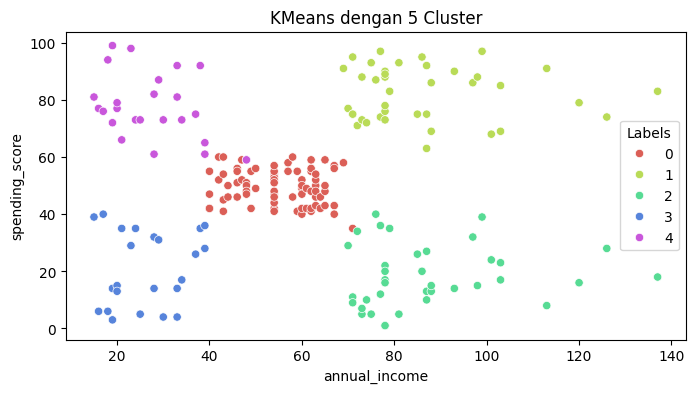

In [ ]:
# Membuat objek K-Means
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()